# Data Preprocessing

In [911]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

## Data Joining

In [912]:
titanic = pd.read_csv('titanic_new.csv')

In [913]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [914]:
titanic.shape

(1309, 12)

(1) buat dataframe a: titanic kolom 1-6, row 1-600  
(2) buat dataframe b: titanic kolom 7-12 + PassengerId, row 1-600  
(3) buat dataframe c: titanic semua kolom, row 601 sampai akhir  
(4) gabungkan a dan b secara horizontal menggunakan kolom 'PassengerId' sebagai acuan, namakan ab (gunakan fungsi merge)   
(5) gabungkanlah ab dan c secara vertikal, namakan abc  
(6) print .head() dan .shape dari abc  

In [915]:
a = titanic.iloc[:600, 0:6]
b = titanic.loc[:599, ['PassengerId'] + list(titanic.columns)[6:]]

In [916]:
a.shape

(600, 6)

In [917]:
b.shape

(600, 7)

In [918]:
b.tail()

,PassengerId,SibSp,Parch,Ticket,Fare,Cabin,Embarked
595,596,1,1,345773,24.1500,NaN,S
596,597,0,0,248727,33.0000,NaN,S
597,598,0,0,LINE,0.0000,NaN,S
598,599,0,0,2664,7.2250,NaN,C
599,600,1,0,PC 17485,56.9292,A20,C


In [919]:
a.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0
596,597,1,2,"Leitch, Miss. Jessie Wills",female,NaN
597,598,0,3,"Johnson, Mr. Alfred",male,49.0
598,599,0,3,"Boulos, Mr. Hanna",male,NaN
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0


In [920]:
c = titanic.iloc[600:]

In [921]:
ab = pd.merge(a, b, on='PassengerId')
ab

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S
596,597,1,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,33.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
598,599,0,3,"Boulos, Mr. Hanna",male,NaN,0,0,2664,7.2250,NaN,C


In [922]:
abc = pd.concat([ab, c], axis=0)
print(abc.head())
print(abc.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(1

## Data Cleaning

Yang perlu dicek pada saat proses data cleaning :  
1. Adanya kesalahan pada tipe data  
2. Duplikat data  
3. Hidden missing data ('?','-',0)  
4. kolom yang tidak bisa dipakai untuk memprediksi label    
5. drop row apabila ada missing data (apabila jumlah row dengan missing data sedikit)

In [923]:
titanic_extra = titanic.tail()

In [924]:
titanic_dup = pd.concat([titanic, titanic_extra], axis=0)

In [925]:
titanic_dup[titanic_dup.duplicated(keep=False)].sort_values('Name')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [926]:
titanic_clean = titanic_dup.drop_duplicates(keep='first')

In [927]:
titanic_clean[titanic_clean.duplicated(keep='first')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


1. Pakai dataset churn  
2. Buat churn_extra = churn.tail()  
3. Dengan menggunakan fungsi concat gabungkan churn dan churn_extra secara vertikal  
4. Identifikasi row yang ada duplikatnya menggunakan .duplicate(keep=False)  
5. Drop salah satu row yang ada duplikatnya menggunakan .drop_duplicated (jangan di drop semua)  
6. Pastikan tidak ada lagi duplikat dengan menggunakan .duplicate(keep=False)  

In [928]:
churn = pd.read_csv('churn.csv')
churn.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [929]:
churn_extra = churn.tail()

In [930]:
churn_dup = pd.concat([churn, churn_extra], axis=0)

In [931]:
churn_dup[churn_dup.duplicated(keep=False)]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [932]:
churn_clean = churn_dup.drop_duplicates(keep='first')

In [933]:
churn_clean[churn_clean.duplicated(keep=False)]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


## Train Test Split

1. pisahkan X (fitur prediktor) dan y (label) dari titanic  
2. lakukan train_test_split (test_size = 0.2, stratify = y) yang menghasilkan X_train, X_test, y_train, y_test  
3. print .head(), type(), dan .shape dari masing-masing variabel  

In [934]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [935]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [936]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [937]:
for set in [X_train, X_test, y_train, y_test]:
    print(set.head())
    print(type(set))
    print(set.shape)
    print('---')

      PassengerId  Pclass                                               Name  \
1021         1022       3                            Spinner, Mr. Henry John   
318           319       1                           Wick, Miss. Mary Natalie   
924           925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
652           653       3                     Kalvik, Mr. Johannes Halvorsen   
1189         1190       1                         Loring, Mr. Joseph Holland   

         Sex   Age  SibSp  Parch           Ticket      Fare Cabin Embarked  
1021    male  32.0      0      0  STON/OQ. 369943    8.0500   NaN        S  
318   female  31.0      0      2            36928  164.8667    C7        S  
924   female   NaN      1      2       W./C. 6607   23.4500   NaN        S  
652     male  21.0      0      0             8475    8.4333   NaN        S  
1189    male  30.0      0      0           113801   45.5000   NaN        S  
<class 'pandas.core.frame.DataFrame'>
(1047, 11)
---
    

In [938]:
y_train.value_counts(normalize=True)

0    0.622732
1    0.377268
Name: Survived, dtype: float64

In [939]:
y_test.value_counts(normalize=True)

0    0.622137
1    0.377863
Name: Survived, dtype: float64

## Missing Value Handling

In [940]:
dummy = pd.DataFrame(np.random.randint(1,6, 25).reshape(5,5), columns=['a','b','c','d','e'])
dummy

,a,b,c,d,e
0,3,1,1,2,2
1,3,3,1,2,5
2,5,5,4,2,5
3,3,4,4,2,3
4,1,5,5,5,5


In [941]:
dummy.iloc[1,1] = np.nan
dummy.iloc[4,3] = np.nan
dummy

,a,b,c,d,e
0,3,1.0,1,2.0,2
1,3,NaN,1,2.0,5
2,5,5.0,4,2.0,5
3,3,4.0,4,2.0,3
4,1,5.0,5,NaN,5


In [942]:
simple_imp2 = SimpleImputer(strategy='mean')
simple_imp2.fit(dummy)

SimpleImputer()

In [943]:
simple_imp2.transform(dummy)

array([[3.  , 1.  , 1.  , 2.  , 2.  ],
       [3.  , 3.75, 1.  , 2.  , 5.  ],
       [5.  , 5.  , 4.  , 2.  , 5.  ],
       [3.  , 4.  , 4.  , 2.  , 3.  ],
       [1.  , 5.  , 5.  , 2.  , 5.  ]])

In [944]:
simple_imp = SimpleImputer(strategy='mean')

In [945]:
dummy['b'].values

array([ 1., nan,  5.,  4.,  5.])

In [946]:
dummy['b']

0    1.0
1    NaN
2    5.0
3    4.0
4    5.0
Name: b, dtype: float64

In [947]:
dummy['b'].shape

(5,)

In [948]:
dummy[['b']]

,b
0,1.0
1,NaN
2,5.0
3,4.0
4,5.0


In [949]:
dummy['b'].values.shape

(5,)

In [950]:
dummy['b'].values.reshape(-1,1).shape

(5, 1)

In [951]:
dummy['b'].values.reshape(-1,1)

array([[ 1.],
       [nan],
       [ 5.],
       [ 4.],
       [ 5.]])

In [952]:
simple_imp.fit(dummy['b'].values.reshape(-1,1))

SimpleImputer()

In [953]:
dummy['b'] = simple_imp.transform(dummy['b'].values.reshape(-1,1))


In [954]:
dummy

,a,b,c,d,e
0,3,1.00,1,2.0,2
1,3,3.75,1,2.0,5
2,5,5.00,4,2.0,5
3,3,4.00,4,2.0,3
4,1,5.00,5,NaN,5


In [955]:
dummy[['d']]

,d
0,2.0
1,2.0
2,2.0
3,2.0
4,NaN


In [956]:
simple_imp_median = SimpleImputer(strategy='median')

In [957]:
simple_imp_median.fit(dummy[['d']])

SimpleImputer(strategy='median')

In [958]:
dummy['d'] = simple_imp_median.transform(dummy[['d']])

In [959]:
dummy['d'] = simple_imp_median.fit_transform(dummy[['d']])

In [960]:
dummy

,a,b,c,d,e
0,3,1.00,1,2.0,2
1,3,3.75,1,2.0,5
2,5,5.00,4,2.0,5
3,3,4.00,4,2.0,3
4,1,5.00,5,2.0,5


In [961]:
dummy['f'] = ['merah', np.nan, 'biru', np.nan, 'kuning']
dummy

,a,b,c,d,e,f
0,3,1.00,1,2.0,2,merah
1,3,3.75,1,2.0,5,NaN
2,5,5.00,4,2.0,5,biru
3,3,4.00,4,2.0,3,NaN
4,1,5.00,5,2.0,5,kuning


In [962]:
knn_imputer = KNNImputer(n_neighbors=1)

In [963]:
ordinal_enc = OrdinalEncoder()

In [964]:
dummy['f'] = ordinal_enc.fit_transform(dummy[['f']])
dummy

,a,b,c,d,e,f
0,3,1.00,1,2.0,2,2.0
1,3,3.75,1,2.0,5,NaN
2,5,5.00,4,2.0,5,0.0
3,3,4.00,4,2.0,3,NaN
4,1,5.00,5,2.0,5,1.0


In [965]:
dum_imputed = pd.DataFrame(knn_imputer.fit_transform(dummy), columns=knn_imputer.feature_names_in_)
dum_imputed

,a,b,c,d,e,f
0,3.0,1.00,1.0,2.0,2.0,2.0
1,3.0,3.75,1.0,2.0,5.0,0.0
2,5.0,5.00,4.0,2.0,5.0,0.0
3,3.0,4.00,4.0,2.0,3.0,0.0
4,1.0,5.00,5.0,2.0,5.0,1.0


In [966]:
knn_imputer.feature_names_in_

array(['a', 'b', 'c', 'd', 'e', 'f'], dtype=object)

In [967]:
dum_imputed['f'] = ordinal_enc.inverse_transform(dum_imputed[['f']])

In [968]:
dum_imputed

,a,b,c,d,e,f
0,3.0,1.00,1.0,2.0,2.0,merah
1,3.0,3.75,1.0,2.0,5.0,biru
2,5.0,5.00,4.0,2.0,5.0,biru
3,3.0,4.00,4.0,2.0,3.0,biru
4,1.0,5.00,5.0,2.0,5.0,kuning


In [969]:
dum_imputed['g'] = [1.4, 1.7, 1.9, 2.1, 2.2]

In [970]:
dum_imputed

,a,b,c,d,e,f,g
0,3.0,1.00,1.0,2.0,2.0,merah,1.4
1,3.0,3.75,1.0,2.0,5.0,biru,1.7
2,5.0,5.00,4.0,2.0,5.0,biru,1.9
3,3.0,4.00,4.0,2.0,3.0,biru,2.1
4,1.0,5.00,5.0,2.0,5.0,kuning,2.2


In [971]:
dum_imputed['g'] = dum_imputed['g'].apply(lambda x: np.round(x))
dum_imputed

,a,b,c,d,e,f,g
0,3.0,1.00,1.0,2.0,2.0,merah,1.0
1,3.0,3.75,1.0,2.0,5.0,biru,2.0
2,5.0,5.00,4.0,2.0,5.0,biru,2.0
3,3.0,4.00,4.0,2.0,3.0,biru,2.0
4,1.0,5.00,5.0,2.0,5.0,kuning,2.0


In [972]:
dum_imputed['g'] = np.round(dum_imputed['g'])

In [973]:
dum_imputed

,a,b,c,d,e,f,g
0,3.0,1.00,1.0,2.0,2.0,merah,1.0
1,3.0,3.75,1.0,2.0,5.0,biru,2.0
2,5.0,5.00,4.0,2.0,5.0,biru,2.0
3,3.0,4.00,4.0,2.0,3.0,biru,2.0
4,1.0,5.00,5.0,2.0,5.0,kuning,2.0


In [974]:
dummy2 = pd.DataFrame(np.random.randint(1,6, 25).reshape(5,5), columns=['a','b','c','d','e'])
dummy2

,a,b,c,d,e
0,3,1,2,1,5
1,1,4,5,1,4
2,3,4,3,4,1
3,1,1,5,1,1
4,2,2,2,5,4


In [975]:
dummy2.iloc[2, 1] = np.nan
dummy2.iloc[3, 4] = np.nan
dummy2

,a,b,c,d,e
0,3,1.0,2,1,5.0
1,1,4.0,5,1,4.0
2,3,NaN,3,4,1.0
3,1,1.0,5,1,NaN
4,2,2.0,2,5,4.0


In [976]:
dummy2['b'] = simple_imp.transform(dummy2[['b']])
dummy2

/home/ergonrizky/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


,a,b,c,d,e
0,3,1.00,2,1,5.0
1,1,4.00,5,1,4.0
2,3,3.75,3,4,1.0
3,1,1.00,5,1,NaN
4,2,2.00,2,5,4.0


In [977]:
dummy2['e'] = simple_imp_median.transform(dummy2[['e']])
dummy2

/home/ergonrizky/.local/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- e
Feature names seen at fit time, yet now missing:
- d

  warnings.warn(message, FutureWarning)


,a,b,c,d,e
0,3,1.00,2,1,5.0
1,1,4.00,5,1,4.0
2,3,3.75,3,4,1.0
3,1,1.00,5,1,2.0
4,2,2.00,2,5,4.0


In [978]:
simple_imp_mode = SimpleImputer(strategy='most_frequent')
simple_imp_mode.fit(dummy2[['d']])
simple_imp_mode

SimpleImputer(strategy='most_frequent')

In [979]:
dummy2

,a,b,c,d,e
0,3,1.00,2,1,5.0
1,1,4.00,5,1,4.0
2,3,3.75,3,4,1.0
3,1,1.00,5,1,2.0
4,2,2.00,2,5,4.0


In [980]:
X_train.isna().sum(axis=0)/len(X_train)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.194842
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.777459
Embarked       0.000000
dtype: float64

In [981]:
X_test.isna().sum(axis=0)/len(X_test)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.225191
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.003817
Cabin          0.763359
Embarked       0.007634
dtype: float64

1. Cabin : Drop  
2. Age : KNN  
3. Embarked : most_frequent  
4. Fare : median  

1. Lakukan imputasi pada kolom 'embarked' menggunakan simple imputer strategy most frequent  
2. lakukan imputasi pada kolom 'fare' menggunakan simple imputer strategy median  
3. buat countplot + print value_counts pre imputation dan post imputation untuk kolom 'embarked'  
4. buat histogram + kdeplot pre imputation dan post imputation untuk kolom 'fare'  
5. hitung mean, median, dan standar deviasi pre imputation dan post imputation untuk kolom 'fare'  

In [982]:
titanic_imputed = titanic.copy(deep=True)

In [983]:
impute_most_frequent = SimpleImputer(strategy='most_frequent')

In [984]:
titanic_imputed['Embarked'] = impute_most_frequent.fit_transform(titanic_imputed[['Embarked']])

In [985]:
titanic_imputed.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

before


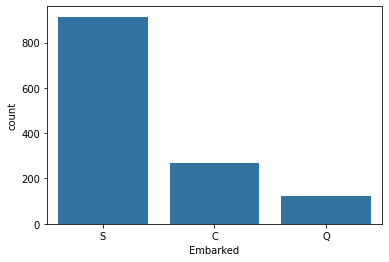

S    914
C    270
Q    123
Name: Embarked, dtype: int64


In [986]:
print('before')
sns.countplot(data = titanic, x='Embarked')
plt.show()
print(titanic['Embarked'].value_counts())

In [987]:
impute_fare = SimpleImputer(strategy='median')

In [988]:
titanic_imputed['Fare'] = impute_fare.fit_transform(titanic_imputed[['Fare']])

In [989]:
titanic_imputed.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

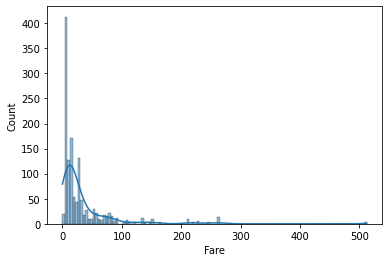

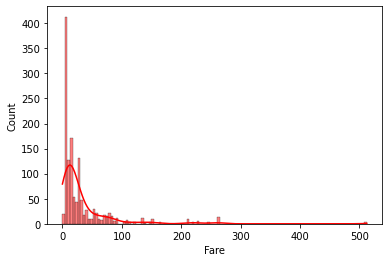

before
count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64
after
count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64


In [990]:
sns.histplot(data=titanic, x='Fare', kde=True, label='Before Imputation')
plt.show()
sns.histplot(data=titanic_imputed, x='Fare', kde=True, label='After Imputation', color='red')
plt.show()
print('before')
print(titanic['Fare'].describe())
print('after')
print(titanic_imputed['Fare'].describe())

In [991]:
titanic_imputed.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [992]:
titanic_imputed.drop('Cabin', axis=1, inplace=True)

In [993]:
titanic_imputed.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [994]:
titanic_imputed.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [995]:
titanic_imputed.drop(['PassengerId', 'Name', 'Parch', 'Ticket'], axis=1, inplace=True)
titanic_imputed.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


1. Dengan menggunakan KNNImputer lakukan imputasi pada kolom 'Age'  
   a. lakukan ordinal encoding pada kolom 'sex' dan 'embarked'  
   b. lakukan knn imputation  
   c. lakukan pembulatan kolom 'sex' dan 'embarked'   
   d. lakukan inverse transform  
2. Buat histogram dan kdeplot before and after imputation untuk kolom 'Age'  
3. Hitung mean, median, std before and after imputation untuk kolom 'Age'

In [996]:
sex_embarked = titanic_imputed[['Sex', 'Embarked']]
sex_embarked.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [997]:
ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
encoded = ordinal_enc.fit_transform(sex_embarked)
type(encoded)

numpy.ndarray

In [998]:
titanic_imputed['Sex'] = encoded[:,0]
titanic_imputed['Embarked'] = encoded[:,1]
titanic_imputed.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1.0,22.0,1,7.2500,2.0
1,1,1,0.0,38.0,1,71.2833,0.0
2,1,3,0.0,26.0,0,7.9250,2.0
3,1,1,0.0,35.0,1,53.1000,2.0
4,0,3,1.0,35.0,0,8.0500,2.0


In [999]:
knn_imp = KNNImputer(n_neighbors=5)
titanic_imputed_knn = pd.DataFrame(knn_imp.fit_transform(titanic_imputed), columns=knn_imp.feature_names_in_)
titanic_imputed_knn.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

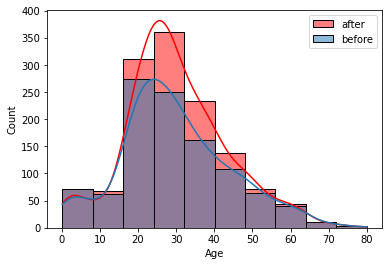

In [1000]:
sns.histplot(data=titanic_imputed_knn, x='Age', label='after', color='red', kde=True, bins=10)
sns.histplot(data=titanic, x='Age', label='before', kde=True, bins=10)
plt.legend()
plt.show()

In [1001]:
print('before')
print(titanic['Age'].describe())
print('after')
print(titanic_imputed_knn['Age'].describe())

before
count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64
after
count    1309.000000
mean       30.104802
std        13.396556
min         0.170000
25%        22.000000
50%        28.000000
75%        37.900000
max        80.000000
Name: Age, dtype: float64


## Train Test Split

1. Pisahkan X (fitur prediktor) dan y (label) dari titanic  
2. Lakukan train test split (test size = 0.2, stratify = y) yang menghasilkan X_train, X_test, y_train, y_test  
3. Print .head(), type(), dan .shape dari masing-masing variabel  

In [1002]:
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Parch', 'Ticket', 'Cabin'], axis=1)
y = titanic['Survived']

In [1003]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)

In [1004]:
for set in (X_train, X_test, y_train, y_test):
    print(set.head())
    print(type(set))
    print(set.shape)
    print('---')

      Pclass     Sex   Age  SibSp      Fare Embarked
1021       3    male  32.0      0    8.0500        S
318        1  female  31.0      0  164.8667        S
924        3  female   NaN      1   23.4500        S
652        3    male  21.0      0    8.4333        S
1189       1    male  30.0      0   45.5000        S
<class 'pandas.core.frame.DataFrame'>
(1047, 6)
---
      Pclass     Sex   Age  SibSp      Fare Embarked
950        1  female  36.0      0  262.3750        C
811        3    male  39.0      0   24.1500        S
475        1    male   NaN      0   52.0000        S
1136       1    male  41.0      1   51.8625        S
137        1    male  37.0      1   53.1000        S
<class 'pandas.core.frame.DataFrame'>
(262, 6)
---
1021    0
318     1
924     1
652     0
1189    0
Name: Survived, dtype: int64
<class 'pandas.core.series.Series'>
(1047,)
---
950     1
811     0
475     0
1136    0
137     0
Name: Survived, dtype: int64
<class 'pandas.core.series.Series'>
(262,)
---


In [1005]:
y_train.value_counts(normalize=True)

0    0.622732
1    0.377268
Name: Survived, dtype: float64

In [1006]:
y_test.value_counts(normalize=True)

0    0.622137
1    0.377863
Name: Survived, dtype: float64

In [1007]:
X_train.isna().sum()

Pclass        0
Sex           0
Age         204
SibSp         0
Fare          0
Embarked      0
dtype: int64

In [1008]:
X_test.isna().sum()

Pclass       0
Sex          0
Age         59
SibSp        0
Fare         1
Embarked     2
dtype: int64

1. Lakukan knn imputation untuk handling missing value di X_train  
2. Buktikan bahwa sudah tidak ada missing value dengan menggunakan .isna().sum()  

In [1009]:
sex_embarked = X_train[['Sex', 'Embarked']]

In [1011]:
ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
sex_embarked_encoded = ordinal_enc.fit_transform(sex_embarked)

In [1013]:
X_train_imp = X_train.copy(deep=True)

In [1014]:
sex_embarked_encoded

array([[1., 2.],
       [0., 2.],
       [0., 2.],
       ...,
       [1., 2.],
       [0., 2.],
       [1., 2.]])

In [1015]:
X_train_imp['Sex'] = sex_embarked_encoded[:,0]
X_train_imp['Embarked'] = sex_embarked_encoded[:,1]
X_train_imp.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
1021,3,1.0,32.0,0,8.0500,2.0
318,1,0.0,31.0,0,164.8667,2.0
924,3,0.0,NaN,1,23.4500,2.0
652,3,1.0,21.0,0,8.4333,2.0
1189,1,1.0,30.0,0,45.5000,2.0


In [1016]:
knn_imp = KNNImputer(n_neighbors=5)

In [1018]:
X_train_imp = pd.DataFrame(knn_imp.fit_transform(X_train_imp), columns=knn_imp.feature_names_in_)

In [1020]:
X_train_imp.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [1022]:
X_train_imp.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3.0,1.0,32.0,0.0,8.0500,2.0
1,1.0,0.0,31.0,0.0,164.8667,2.0
2,3.0,0.0,22.2,1.0,23.4500,2.0
3,3.0,1.0,21.0,0.0,8.4333,2.0
4,1.0,1.0,30.0,0.0,45.5000,2.0


In [1023]:
sex_embarked_imp = X_train_imp[['Sex', 'Embarked']]

In [1025]:
sex_embarked_imp['Sex'].unique()

array([1., 0.])

In [1026]:
sex_embarked_imp['Embarked'].unique()

array([2., 1., 0.])

In [1028]:
sex_embarked_inv = ordinal_enc.inverse_transform(sex_embarked_imp)

In [1029]:
X_train_imp['Sex'] = sex_embarked_inv[:,0]
X_train_imp['Embarked'] = sex_embarked_inv[:,1]

In [1030]:
X_train_imp.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3.0,male,32.0,0.0,8.0500,S
1,1.0,female,31.0,0.0,164.8667,S
2,3.0,female,22.2,1.0,23.4500,S
3,3.0,male,21.0,0.0,8.4333,S
4,1.0,male,30.0,0.0,45.5000,S
